## 导入包

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

## 函数定义

In [39]:
function = lambda x: 5* x**4 + 4* x**3 + 3* x**2 + 2*x + 1

## 数据采集

In [40]:
# 设置随机种子
torch.manual_seed(42)
np.random.seed(42)

# 生成1000个随机的x值，x在-5到5之间
x_values = np.random.uniform(-5, 5, 1000)
y_values = function(x_values)

# 将x和y组合成数据集
data = np.column_stack((x_values, y_values))

# 打乱数据
np.random.shuffle(data)

# 划分训练集和测试集
train_data = data[:800]
test_data = data[800:]

# 提取训练集和测试集的x和y
x_train, y_train = train_data[:, 0], train_data[:, 1]
x_test, y_test = test_data[:, 0], test_data[:, 1]

# 打印训练集和测试集的形状以验证
print("训练集形状:", x_train.shape, y_train.shape)
print("测试集形状:", x_test.shape, y_test.shape)

# 将数据转换为PyTorch张量
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).view(-1, 1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


训练集形状: (800,) (800,)
测试集形状: (200,) (200,)


## 模型描述

In [41]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(1, 128) 
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

## 训练模型

In [42]:
# 初始化模型、损失函数和优化器
model = MyModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 训练模型
num_epochs = 10000
for epoch in range(num_epochs):
    # 前向传播
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1000/10000], Loss: 72.1220
Epoch [2000/10000], Loss: 7.5257
Epoch [3000/10000], Loss: 2.3306
Epoch [4000/10000], Loss: 1.0571
Epoch [5000/10000], Loss: 5.5505
Epoch [6000/10000], Loss: 0.3744
Epoch [7000/10000], Loss: 2.3989
Epoch [8000/10000], Loss: 0.9434
Epoch [9000/10000], Loss: 7.5530
Epoch [10000/10000], Loss: 0.2871


## 拟合效果（测试）

Test Loss: 0.3453


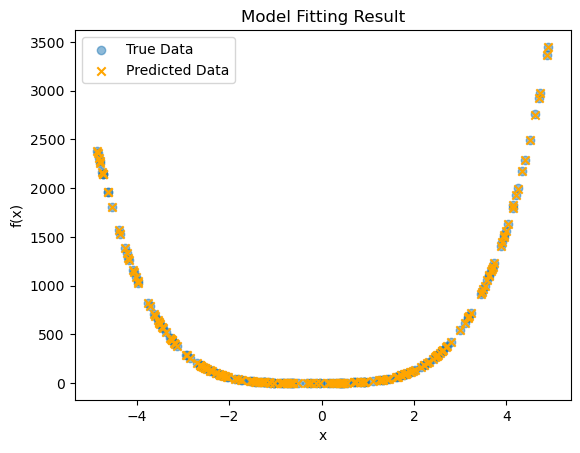

In [ ]:
# 测试模型
model.eval()
with torch.no_grad():
    test_outputs = model(x_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

# 绘制拟合效果
plt.scatter(x_test, y_test, label='True Data', alpha=0.5)
plt.scatter(x_test, test_outputs.numpy(), color='orange', marker='x', label='Predicted Data')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Model Fitting Result')
plt.show()